In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as sp
%config InlineBackend.figure_format = 'svg'

#PLOT OPTIONS
lw=1.5
ls1='-'
ls2='--'
s_col = [(0.1216,0.4667,0.7059), (0.1725,0.6275,0.1725), (0.8392,0.1529,0.1569), (1.0000,0.4980,0.0549)]
d_col = [tuple(c-0.05 for c in color) for color in s_col]
# for color in s_col:
#     shifted = tuple(c + 0.1 for c in color)
#     if any(c > 1.0 for c in shifted):
#         max_val = max(shifted)
#         normalized = tuple(c / max_val for c in shifted)
#         d_col.append(normalized)
#     else:
#         d_col.append(shifted)

path = 'C:/Users/Mattia Mencagli/Documents/DATA/Latenze/nuovi_files/'
pathfigs = path+'figs/'
names = ['pca-appConAlgo/', 'pca-appNoAlgo/', 'core-gui-appConAlgo3/', 'core-gui-appNoAlgo2/']

header_cpu = ['Pid', 'CPU_PCA', 'CPUmem_PCA', 'Pid_serverX', 'CPU_serverX', 'mem_serverX'] #dividi per 8 le percentuali cpu
header_gpu = ['GPU_util_PCA', 'GPUmem_PCA%', 'GPUmem_PCA', 'GPUmem_TOT', 'clock_SM', 'clock_mem', 'temperature']
namebars = ['PCA-U Algo ON', 'PCA-U Algo OFF', 'PCA-CG Algo ON', 'PCA-CG Algo OFF']

def read_data(path, names, dev):
    DATA = []
    for i,name in enumerate(names):
        DATA.append(np.genfromtxt(path+name+dev+'.txt', delimiter=' ', skip_header=True).T)
    return DATA

data_cpu = read_data(path, names, 'cpu_stat')
data_gpu = read_data(path, names, 'gpu_stat_clean')

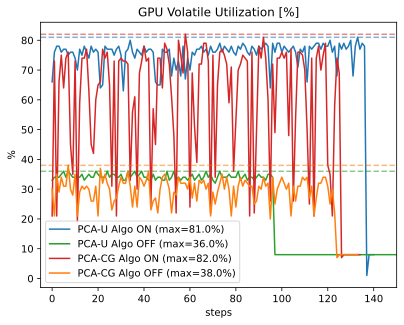

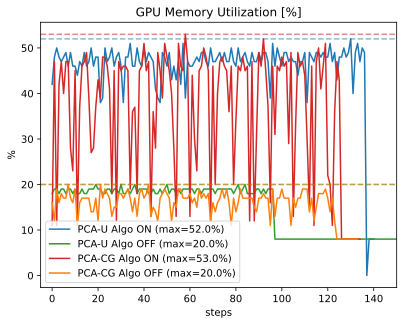

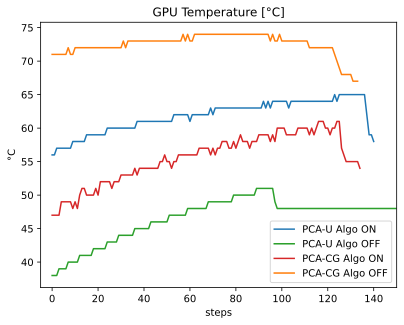

In [109]:
def plottino_gpu(i, name,savename, YL='%', MEAN=True):
    plt.figure(i)
    for j,n in enumerate(names):
        mask = data_gpu[j][i,:] > 10
        m = np.mean(data_gpu[j][i,mask])
        m = np.max(data_gpu[j][i,:])
        if MEAN : lab = namebars[j]+" (max=%1.1f%%)"%m
        else    : lab = namebars[j]
        plt.plot(data_gpu[j][i,:], color=s_col[j], linewidth=lw, linestyle=ls1, label=lab)
        if MEAN : plt.axhline(m, color=d_col[j], linewidth=lw, linestyle=ls2, alpha=0.5)
    plt.title(name)
    plt.xlim((-5,150))
    plt.xlabel('steps')
    plt.ylabel(YL)
    plt.legend()
    plt.savefig(pathfigs+savename+'.svg', bbox_inches='tight', format='svg')

plottino_gpu(0, 'GPU Volatile Utilization [%]', 'gpu_util')
plottino_gpu(1, 'GPU Memory Utilization [%]', 'gpu_mem')
plottino_gpu(6, 'GPU Temperature [°C]', 'gpu_temp', '°C', False)

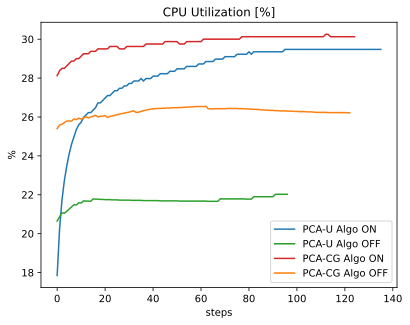

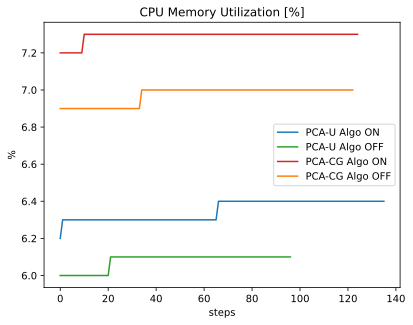

In [108]:
def plottino_gpu(i,name,savename,fac,YL='%'):
    plt.figure(i)
    for j,n in enumerate(names):
        plt.plot(fac*(data_cpu[j][i,:]+data_cpu[j][i+3,:]), color=s_col[j], linewidth=lw, linestyle=ls1, label=namebars[j])
    plt.title(name)
    plt.xlabel('steps')
    plt.ylabel(YL)
    # plt.ylim((0,100))
    plt.legend()
    plt.savefig(pathfigs+savename+'.svg', bbox_inches='tight', format='svg')

plottino_gpu(1, 'CPU Utilization [%]', 'cpu_util', 0.125)
plottino_gpu(2, 'CPU Memory Utilization [%]', 'cpu_mem', 1.0)